  ![ImdbIcon](images/pets.jpg)
# Petfinder 


## 1. Imports and Data Cleaning ##

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction import text

In [3]:
df = pd.read_csv('./petfinder_data/train.csv')

In [4]:
df.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


In [5]:
df.shape

(14993, 24)

In [6]:
df.isnull().sum()

Type                0
Name             1257
Age                 0
Breed1              0
Breed2              0
Gender              0
Color1              0
Color2              0
Color3              0
MaturitySize        0
FurLength           0
Vaccinated          0
Dewormed            0
Sterilized          0
Health              0
Quantity            0
Fee                 0
State               0
RescuerID           0
VideoAmt            0
Description        12
PetID               0
PhotoAmt            0
AdoptionSpeed       0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           14993 non-null  int64  
 1   Name           13736 non-null  object 
 2   Age            14993 non-null  int64  
 3   Breed1         14993 non-null  int64  
 4   Breed2         14993 non-null  int64  
 5   Gender         14993 non-null  int64  
 6   Color1         14993 non-null  int64  
 7   Color2         14993 non-null  int64  
 8   Color3         14993 non-null  int64  
 9   MaturitySize   14993 non-null  int64  
 10  FurLength      14993 non-null  int64  
 11  Vaccinated     14993 non-null  int64  
 12  Dewormed       14993 non-null  int64  
 13  Sterilized     14993 non-null  int64  
 14  Health         14993 non-null  int64  
 15  Quantity       14993 non-null  int64  
 16  Fee            14993 non-null  int64  
 17  State          14993 non-null  int64  
 18  Rescue

In [8]:
df = df[(df['Quantity'] > 1)]

In [9]:
df.shape

(3428, 24)

---------------------
# Outlier Exploration

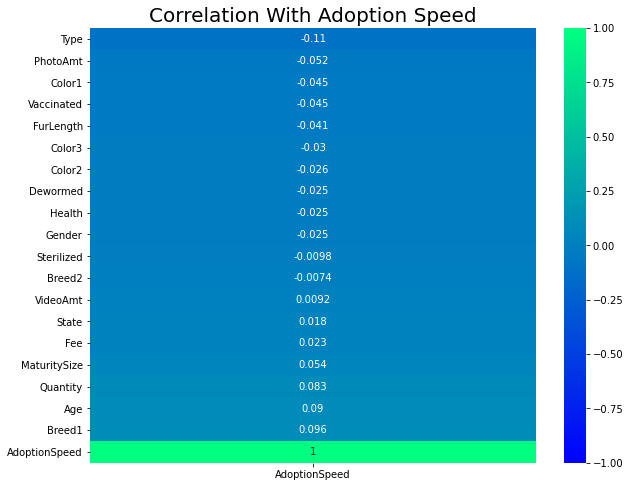

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr()[['AdoptionSpeed']].sort_values(by='AdoptionSpeed', ascending=True),
            vmin = -1, vmax=1,
            cmap ='winter',
            annot = True,);
plt.title("Correlation With Adoption Speed", size = 20);

In [ ]:
df.AdoptionSpeed.value_counts()

## - Count Vectorizing

In [14]:
df.Description.isnull().sum()

3

In [15]:
# Dropping the two rows without descriptions prior to count vectorizing
df = df[df['Description'].notna()]

In [16]:
df.Description.isnull().sum()

0

In [ ]:
#dog_list = ['home', 'dog', 'puppy', 'adoption', 'adopt', 'looking', 'interested', 'dogs', 'adopter', 'like', 'time', 'months', 'new', 'just', 'need']

In [ ]:
#stop_words = text.ENGLISH_STOP_WORDS.union(dog_list)

In [17]:
dog_cvec= CountVectorizer(stop_words='english')
X = df['Description']
dog_cvec.fit(X)
X_trans = dog_cvec.transform(X)

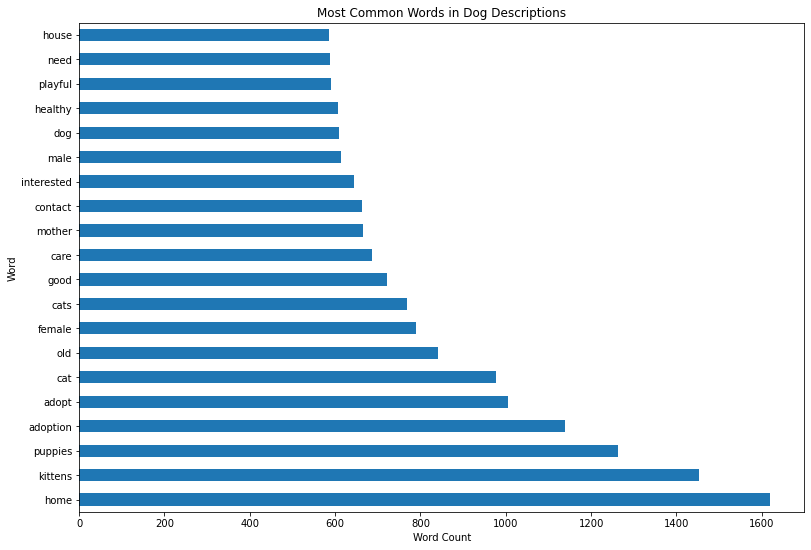

In [18]:
X_trans = pd.DataFrame(X_trans.todense(), 
                 columns=dog_cvec.get_feature_names())

plt.figure(figsize = [13, 9])
plt.title('Most Common Words in Dog Descriptions')
plt.xlabel('Word Count')
plt.ylabel('Word')
X_trans.sum().sort_values(ascending = False).head(20).plot(kind='barh');